In [1]:
import scanpy as sc

In [2]:
sc_data = sc.read_h5ad('/mnt/d/dailywork/multivelo/sc_all_adata.h5ad')

In [7]:
sc_data.layers['spliced'][:100, :100]

<100x100 sparse matrix of type '<class 'numpy.float32'>'
	with 2288 stored elements in Compressed Sparse Row format>

In [3]:
multivelo = sc.read_h5ad('/mnt/d/dailywork/multivelo/multivelo_final_cns.h5ad')

In [4]:
import numpy as np

sub_index = np.random.choice(multivelo.obs.index, size=1000, replace=False)
subsample_data = multivelo[sub_index, :]

/home/ouyangkang/software/anaconda3/envs/scRNA/lib/python3.8/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/home/ouyangkang/software/anaconda3/envs/scRNA/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


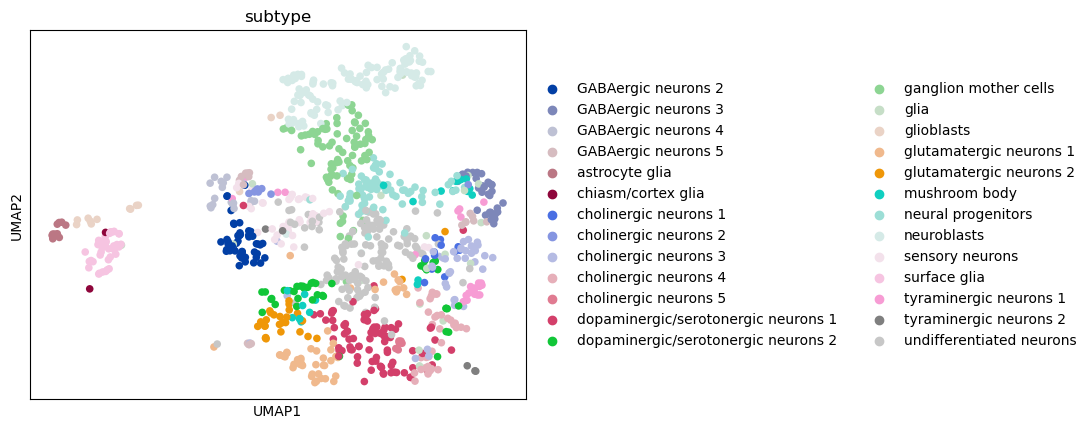

In [5]:
sc.pl.umap(subsample_data, color = 'subtype')

In [6]:
subsample_data

AnnData object with n_obs × n_vars = 1000 × 16725
    obs: 'orig.ident', 'nCount_peak', 'nFeature_peak', 'blacklist_region_fragments', 'blacklist_ratio', 'high.tss', 'fragments', 'nucleosome_signal', 'TSS.enrichment', 'doublet_score', 'predicted_doublet', 'time', 'FRiP', 'pct_reads_in_peaks', 'peak_region_fragments', 'reads_per_peak', 'peak_snn_res.0.3', 'seurat_clusters', 'tissue', 'cell_type', 'germ_layer', 'subtype', 'subtype_clusters', 'rough_subtype'
    var: 'name'
    uns: 'subtype_colors'
    obsm: 'X_lsi', 'X_pca', 'X_pca.l2', 'X_umap'

In [7]:
subsample_data.layers['spliced'] = sc_data.layers['spliced'][:1000, :16725]

In [8]:
subsample_data.layers['unspliced'] = sc_data.layers['unspliced'][:1000, :16725]

In [9]:
import scvelo as scv

scv.pp.log1p(subsample_data)

In [10]:
scv.pp.moments(subsample_data, n_pcs=30, n_neighbors=50)

Normalized count data: spliced, unspliced.
computing neighbors
    finished (0:00:09) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [13]:
subsample_data.write('/home/ouyangkang/data/multivelo/CNS_multivelo_result.h5ad')

In [2]:
subsample_data = sc.read_h5ad('/home/ouyangkang/data/multivelo/CNS_multivelo_result.h5ad')

In [4]:
import numpy as np

n_gene = 1000
all_gene = subsample_data.var_names

sub_gene_index = np.random.choice(len(all_gene), size=n_gene, replace=False)
sampled_gene = all_gene[sub_gene_index]

sub_sub_data = subsample_data[:, sampled_gene]

In [5]:
sub_sub_data

View of AnnData object with n_obs × n_vars = 1000 × 1000
    obs: 'orig.ident', 'nCount_peak', 'nFeature_peak', 'blacklist_region_fragments', 'blacklist_ratio', 'high.tss', 'fragments', 'nucleosome_signal', 'TSS.enrichment', 'doublet_score', 'predicted_doublet', 'time', 'FRiP', 'pct_reads_in_peaks', 'peak_region_fragments', 'reads_per_peak', 'peak_snn_res.0.3', 'seurat_clusters', 'tissue', 'cell_type', 'germ_layer', 'subtype', 'subtype_clusters', 'rough_subtype', 'n_counts'
    var: 'name'
    uns: 'neighbors', 'subtype_colors'
    obsm: 'X_lsi', 'X_pca', 'X_pca.l2', 'X_umap'
    layers: 'Ms', 'Mu', 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'

In [6]:
import multivelo as mv

try_result = mv.recover_dynamics_chrom(sub_sub_data,
                                    #
                                      max_iter=5,
                                      init_mode='invert',
                                      verbose=False,
                                      parallel=True,
                                      save_plot=False,
                                      rna_only=False,
                                      fit=True,
                                      n_anchors=500,
                                      extra_color_key='subtype')

  0%|          | 0/1000 [00:00<?, ?it/s]

In [7]:
mv.velocity_graph(try_result)
mv.latent_time(try_result)

computing velocity graph (using 1/8 cores)


  0%|          | 0/1000 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velo_s_norm_graph', sparse matrix with cosine correlations (adata.uns)
computing terminal states
    identified 1 region of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:00) --> added 
    'latent_time', shared time (adata.obs)


In [8]:
try_result

AnnData object with n_obs × n_vars = 1000 × 269
    obs: 'orig.ident', 'nCount_peak', 'nFeature_peak', 'blacklist_region_fragments', 'blacklist_ratio', 'high.tss', 'fragments', 'nucleosome_signal', 'TSS.enrichment', 'doublet_score', 'predicted_doublet', 'time', 'FRiP', 'pct_reads_in_peaks', 'peak_region_fragments', 'reads_per_peak', 'peak_snn_res.0.3', 'seurat_clusters', 'tissue', 'cell_type', 'germ_layer', 'subtype', 'subtype_clusters', 'rough_subtype', 'n_counts', 'velo_s_norm_self_transition', 'root_cells', 'end_points', 'velo_s_norm_pseudotime', 'latent_time'
    var: 'name', 'fit_alpha_c', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_sw1', 'fit_t_sw2', 'fit_t_sw3', 'fit_scale_cc', 'fit_rescale_c', 'fit_rescale_u', 'fit_alignment_scaling', 'fit_model', 'fit_direction', 'fit_loss', 'fit_likelihood', 'fit_likelihood_c', 'fit_ssd_c', 'fit_var_c', 'fit_c0', 'fit_u0', 'fit_s0', 'fit_anchor_min_idx', 'fit_anchor_max_idx', 'fit_anchor_velo_min_idx', 'fit_anchor_velo_max_idx', 'velo_s_gene

computing velocity embedding
    finished (0:00:00) --> added
    'velo_s_norm_umap', embedded velocity vectors (adata.obsm)


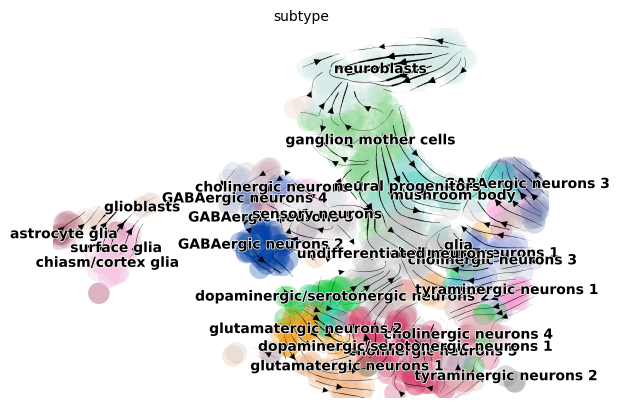

In [9]:
mv.velocity_embedding_stream(try_result, basis='umap', color='subtype')